In [62]:
# Import all the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline


import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
from plotly.offline import iplot
import plotly.graph_objs as go#visualization
import plotly.subplots as sp #visualization
import plotly.figure_factory as ff#visualization

## Data Import

In [63]:
bank = pd.read_csv('Bank Customer Churn Prediction.csv')

## Data Overview

In [64]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [65]:
print ("Rows     : " ,bank.shape[0])
print ("Columns  : " ,bank.shape[1])
print ("\nFeatures : \n" ,bank.columns.tolist())
print ("\nUnique values :  \n",bank.nunique())

Rows     :  10000
Columns  :  12

Features : 
 ['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']

Unique values :  
 customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64


In [66]:
bank.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

### Replace all the blank values with NAN


In [67]:
bank = bank.replace(" ", np.NaN)
bank.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [68]:
# check for isnull() again
bank.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

## Data Cleaning

#### We will keep 11 input variables and 1 output variable (Churn) to create the model

- customer_id
- credit_score
- country
- gender
- age
- tenure
- balance
- products_number
- credit_card
- active_member
- estimated_salary
- churn


In [69]:
missing_data = bank.isnull()
missing_data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False


In [70]:
# Count missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

customer_id
False    10000
Name: customer_id, dtype: int64

credit_score
False    10000
Name: credit_score, dtype: int64

country
False    10000
Name: country, dtype: int64

gender
False    10000
Name: gender, dtype: int64

age
False    10000
Name: age, dtype: int64

tenure
False    10000
Name: tenure, dtype: int64

balance
False    10000
Name: balance, dtype: int64

products_number
False    10000
Name: products_number, dtype: int64

credit_card
False    10000
Name: credit_card, dtype: int64

active_member
False    10000
Name: active_member, dtype: int64

estimated_salary
False    10000
Name: estimated_salary, dtype: int64

churn
False    10000
Name: churn, dtype: int64



### Dependent Variable or Variable of Interest is Churn

In [71]:
#Separating churn and non churn customers

churn     = bank[bank["churn"] == 1]
not_churn = bank[bank["churn"] == 0]

#### Customers who stay and left

In [72]:
print ('Customers who stayed', len(not_churn))
print ('Customers who left', len(churn))

Customers who stayed 7963
Customers who left 2037


In [73]:
#Separating catagorical and numerical columns
Id_col     = ['customer_id']
target_col = ["churn"]
cat_cols   = bank.keys().tolist()

In [74]:
cat_cols


['customer_id',
 'credit_score',
 'country',
 'gender',
 'age',
 'tenure',
 'balance',
 'products_number',
 'credit_card',
 'active_member',
 'estimated_salary',
 'churn']

In [75]:
cat_cols   = bank.nunique()[bank.nunique() < 6].keys().tolist()


In [76]:
cat_cols

['country',
 'gender',
 'products_number',
 'credit_card',
 'active_member',
 'churn']

In [77]:
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in bank.columns if x not in cat_cols + target_col + Id_col]

In [78]:
cat_cols

['country', 'gender', 'products_number', 'credit_card', 'active_member']

In [79]:
num_cols

['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']

In [80]:
Id_col

['customer_id']

In [81]:
target_col

['churn']

## Exploratory Data Analysis

### Churn No-Churn Ratio

In [82]:
#labels
lab = bank["churn"].value_counts().keys().tolist()
#values
val = bank["churn"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Churn vs. Non-Churn",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)

iplot(fig)

### From the above graph, majority of the people(79.6%) still continue the service of the bank.

In [83]:
data

[Pie({
     'hole': 0.5,
     'hoverinfo': 'label+value+text',
     'labels': [0, 1],
     'marker': {'colors': ['royalblue', 'lime'], 'line': {'color': 'white', 'width': 1.3}},
     'rotation': 90,
     'values': [7963, 2037]
 })]

In [84]:
bank['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

## Varibles distribution in Churn and Non-churn category: Pie Charts for Categorical variables

In [85]:
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer Churn ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    iplot(fig)

In [86]:
# for all categorical columns plot pie

for i in cat_cols :
    plot_pie(i)

### products_number affects to churn a lot as there are huge difference between the products which affect to churn. Otherthan that all 4 columns has almost equal ratio of churn and not churn.



## Varibles distribution in Churn and Non-churn category: Histograms for Numerical variables

In [87]:
#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer Churn ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    iplot(fig)

In [88]:
#for all categorical columns plot histogram    
for i in num_cols :
    histogram(i)
plt.show()

### From the above graph, it can be said that age as well as credit score affect a lot to churn.

## Scatter Plot for Numerical variables

In [89]:
#function  for scatter plot matrix  for numerical columns in data
def scatter_matrix(df)  :
    
    df  = df.sort_values(by = "churn" ,ascending = True)
    classes = df["churn"].unique().tolist()
    classes
    
    class_code  = {classes[k] : k for k in range(2)}
    class_code

    color_vals = [class_code[cl] for cl in df["churn"]]
    color_vals

    pl_colorscale = "Portland"

    pl_colorscale

    text = [df.loc[k,"churn"] for k in range(len(df))]
    text

    trace = go.Splom(dimensions = [dict(label  = "credit_score",
                                       values = df["credit_score"]),
                                  dict(label  = 'age',
                                       values = df['age']),
                                  dict(label  = 'tenure',
                                       values = df['tenure']),
                                  dict(label  = 'balance',
                                       values = df['balance']),
                                  dict(label  = 'estimated_salary',
                                       values = df['estimated_salary'])],
                                  
                     text = text,
                     marker = dict(color = color_vals,
                                   colorscale = pl_colorscale,
                                   size = 3,
                                   showscale = False,
                                   line = dict(width = .1,
                                               color='rgb(230,230,230)'
                                              )
                                  )
                    )
    axis = dict(showline  = True,
                zeroline  = False,
                gridcolor = "#fff",
                ticklen   = 4
               )
    
    layout = go.Layout(dict(title  = 
                            "Scatter plot matrix for Numerical columns for customer churn",
                            autosize = False,
                            height = 800,
                            width  = 800,
                            dragmode = "select",
                            hovermode = "closest",
                            plot_bgcolor  = 'rgba(240,240,240, 0.95)',
                            xaxis1 = dict(axis),
                            yaxis1 = dict(axis),
                            xaxis2 = dict(axis),
                            yaxis2 = dict(axis),
                            xaxis3 = dict(axis),
                            yaxis3 = dict(axis),
                           )
                      )
    data   = [trace]
    fig = go.Figure(data = data,layout = layout )
    iplot(fig)

In [90]:
#scatter plot matrix
scatter_matrix(bank)

## Data Pre-Processing

In [91]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


#customer id col
Id_col     = ['customer_id']
#Target columns
target_col = ["churn"]
#categorical columns
cat_cols   = bank.nunique()[bank.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in bank.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols   = bank.nunique()[bank.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

In [92]:
multi_cols

['country', 'products_number']

In [93]:
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    bank[i] = le.fit_transform(bank[i])
    
#Duplicating columns for multi value columns
bank = pd.get_dummies(data = bank,columns = multi_cols)

In [94]:
bank

,customer_id,credit_score,gender,age,tenure,balance,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,products_number_1,products_number_2,products_number_3,products_number_4
0,15634602,619,0,42,2,0.00,1,1,101348.88,1,1,0,0,1,0,0,0
1,15647311,608,0,41,1,83807.86,0,1,112542.58,0,0,0,1,1,0,0,0
2,15619304,502,0,42,8,159660.80,1,0,113931.57,1,1,0,0,0,0,1,0
3,15701354,699,0,39,1,0.00,0,0,93826.63,0,1,0,0,0,1,0,0
4,15737888,850,0,43,2,125510.82,1,1,79084.10,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,1,39,5,0.00,1,0,96270.64,0,1,0,0,0,1,0,0
9996,15569892,516,1,35,10,57369.61,1,1,101699.77,0,1,0,0,1,0,0,0
9997,15584532,709,0,36,7,0.00,0,1,42085.58,1,1,0,0,1,0,0,0
9998,15682355,772,1,42,3,75075.31,1,0,92888.52,1,0,1,0,0,1,0,0


In [95]:
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(bank[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [96]:
scaled

,credit_score,age,tenure,balance,estimated_salary
0,-0.326221,0.293517,-1.041760,-1.225848,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,0.216534
2,-1.536794,0.293517,1.032908,1.333053,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.365276
...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,-0.066419
9996,-1.391939,-0.373958,1.724464,-0.306379,0.027988
9997,0.604988,-0.278604,0.687130,-1.225848,-1.008643
9998,1.256835,0.293517,-0.695982,-0.022608,-0.125231


In [97]:
bank = bank.drop(columns = num_cols,axis = 1)
bank = bank.merge(scaled,left_index=True,right_index=True,how = "left")

In [98]:
bank

,customer_id,gender,credit_card,active_member,churn,country_France,country_Germany,country_Spain,products_number_1,products_number_2,products_number_3,products_number_4,credit_score,age,tenure,balance,estimated_salary
0,15634602,0,1,1,1,1,0,0,1,0,0,0,-0.326221,0.293517,-1.041760,-1.225848,0.021886
1,15647311,0,0,1,0,0,0,1,1,0,0,0,-0.440036,0.198164,-1.387538,0.117350,0.216534
2,15619304,0,1,0,1,1,0,0,0,0,1,0,-1.536794,0.293517,1.032908,1.333053,0.240687
3,15701354,0,0,0,0,1,0,0,0,1,0,0,0.501521,0.007457,-1.387538,-1.225848,-0.108918
4,15737888,0,1,1,0,0,0,1,1,0,0,0,2.063884,0.388871,-1.041760,0.785728,-0.365276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,1,1,0,0,1,0,0,0,1,0,0,1.246488,0.007457,-0.004426,-1.225848,-0.066419
9996,15569892,1,1,1,0,1,0,0,1,0,0,0,-1.391939,-0.373958,1.724464,-0.306379,0.027988
9997,15584532,0,0,1,1,1,0,0,1,0,0,0,0.604988,-0.278604,0.687130,-1.225848,-1.008643
9998,15682355,1,1,0,1,0,1,0,0,1,0,0,1.256835,0.293517,-0.695982,-0.022608,-0.125231


In [99]:
summary = bank.describe().transpose()
summary

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,1.556570e+07,1.562853e+07,1.569074e+07,1.575323e+07,1.581569e+07
gender,10000.0,5.457000e-01,0.497932,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
credit_card,10000.0,7.055000e-01,0.455840,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
active_member,10000.0,5.151000e-01,0.499797,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
churn,10000.0,2.037000e-01,0.402769,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
country_France,10000.0,5.014000e-01,0.500023,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
country_Germany,10000.0,2.509000e-01,0.433553,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
country_Spain,10000.0,2.477000e-01,0.431698,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
products_number_1,10000.0,5.084000e-01,0.499954,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
products_number_2,10000.0,4.590000e-01,0.498341,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


## Variable summary

In [100]:
# To make it look nice we can do some additional stuff if needed
summary = (bank[[i for i in bank.columns if i not in Id_col]].
           describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['#119DFF']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Variable Summary"))
figure = go.Figure(data=[trace],layout=layout)
iplot(figure)

In [101]:
#correlation
correlation = bank.corr()
#tick labels
matrix_cols = correlation.columns.tolist()

In [102]:
#convert to array
corr_array  = np.array(correlation)

In [103]:
correlation

,customer_id,gender,credit_card,active_member,churn,country_France,country_Germany,country_Spain,products_number_1,products_number_2,products_number_3,products_number_4,credit_score,age,tenure,balance,estimated_salary
customer_id,1.000000,-0.002641,-0.014025,0.001665,-0.006248,-0.004049,-0.003097,0.007800,-0.018501,0.014917,0.018706,-0.015462,0.005308,0.009497,-0.014883,-0.012419,0.015271
gender,-0.002641,1.000000,0.005766,0.022544,-0.106512,0.006772,-0.024628,0.016889,0.005488,0.010171,-0.035143,-0.027936,-0.002857,-0.027544,0.014733,0.012087,-0.008112
credit_card,-0.014025,0.005766,1.000000,-0.011866,-0.007138,0.002467,0.010577,-0.013480,-0.003845,0.003414,0.003186,-0.003778,-0.005458,-0.011721,0.022583,-0.014858,-0.009933
active_member,0.001665,0.022544,-0.011866,1.000000,-0.156128,0.003317,-0.020486,0.016732,-0.022321,0.032802,-0.029864,-0.004938,0.025651,0.085472,-0.028362,-0.010084,-0.011421
churn,-0.006248,-0.106512,-0.007138,-0.156128,1.000000,-0.104955,0.173488,-0.052667,0.185447,-0.292474,0.255862,0.153612,-0.027094,0.285323,-0.014001,0.118533,0.012097
country_France,-0.004049,0.006772,0.002467,0.003317,-0.104955,1.000000,-0.580359,-0.575418,-0.014049,0.026318,-0.036508,-0.002807,-0.008928,-0.039208,-0.002848,-0.231329,-0.003332
country_Germany,-0.003097,-0.024628,0.010577,-0.020486,0.173488,-0.580359,1.000000,-0.332084,0.033878,-0.051673,0.041945,0.026720,0.005538,0.046897,-0.000567,0.401110,0.010297
country_Spain,0.007800,0.016889,-0.013480,0.016732,-0.052667,-0.575418,-0.332084,1.000000,-0.017750,0.021411,0.000161,-0.023583,0.004780,-0.001685,0.003868,-0.134892,-0.006482
products_number_1,-0.018501,0.005488,-0.003845,-0.022321,0.185447,-0.014049,0.033878,-0.017750,1.000000,-0.936709,-0.168109,-0.079009,-0.014813,0.072852,-0.013423,0.359646,-0.010663
products_number_2,0.014917,0.010171,0.003414,0.032802,-0.292474,0.026318,-0.051673,0.021411,-0.936709,1.000000,-0.152266,-0.071563,0.015819,-0.102604,0.012438,-0.363260,0.005795


In [104]:
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
iplot(fig)

## Model Building (We will build Decision Tree and Logistics Regression models)

In [105]:
# Import all the modules

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score

In [106]:
#splitting train and test data 
train,test = train_test_split(bank,test_size = .25 ,random_state = 111)

In [107]:
##seperating dependent and independent variables
cols    = [i for i in bank.columns if i not in Id_col + target_col]
X_train = train[cols]
Y_train = train[target_col]
X_test  = test[cols]
Y_test  = test[target_col]

## Logistics Regression

In [108]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [109]:
# Predicting test set
y_pred = classifier.predict(X_test)

In [110]:
classifier.coef_

array([[-0.5790545 , -0.07088232, -1.09303953, -0.3507228 ,  0.63168598,
        -0.28143816, -1.09019395, -2.66869861,  1.31184263,  2.44657494,
        -0.03056978,  0.73546963, -0.06948406, -0.05155216,  0.0042424 ]])

In [111]:
#Evaluating the Results
cm = confusion_matrix(Y_test, y_pred)
cm

array([[1900,   82],
       [ 337,  181]], dtype=int64)

In [112]:
accuracy_score(Y_test, y_pred)

0.8324

In [113]:
precision_score(Y_test, y_pred)

0.688212927756654

In [114]:
f1_score(Y_test, y_pred)

0.4635083226632522

In [115]:
recall_score(Y_test, y_pred)

0.34942084942084944

Test Data Accuracy: 0.8324


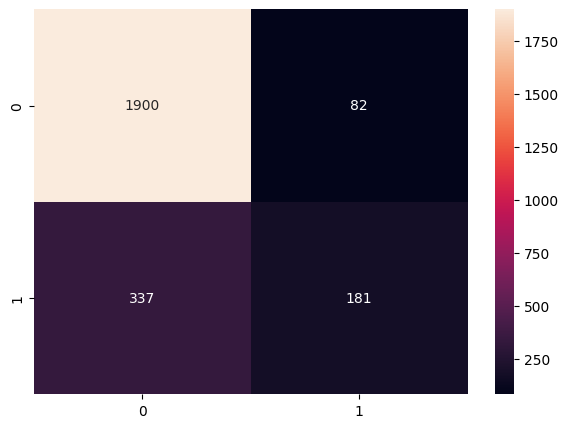

In [116]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(Y_test, y_pred))

## Decision Tree

In [117]:
model_tree = DecisionTreeClassifier(random_state = 2)
model_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=2)

In [118]:
# Predicting test set
y_pred = model_tree.predict(X_test)

In [119]:
#Evaluating the Results
cm = confusion_matrix(Y_test, y_pred)
cm


array([[1733,  249],
       [ 275,  243]], dtype=int64)

In [120]:
accuracy_score(Y_test, y_pred)

0.7904

In [121]:
precision_score(Y_test, y_pred)

0.49390243902439024

In [122]:
f1_score(Y_test, y_pred)

0.48118811881188117

In [123]:
recall_score(Y_test, y_pred)

0.4691119691119691

Test Data Accuracy: 0.7904


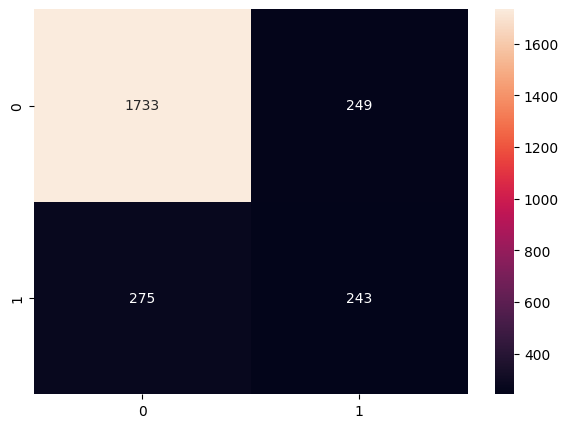

In [124]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(Y_test, y_pred))

## Feature Seclection/Feature Engineering

[0.10904908 0.01952741 0.02250159 0.03542921 0.0100426  0.02173275
 0.00739751 0.03206847 0.06279106 0.04150535 0.01275969 0.11009454
 0.19920859 0.09187423 0.11543582 0.10858211]


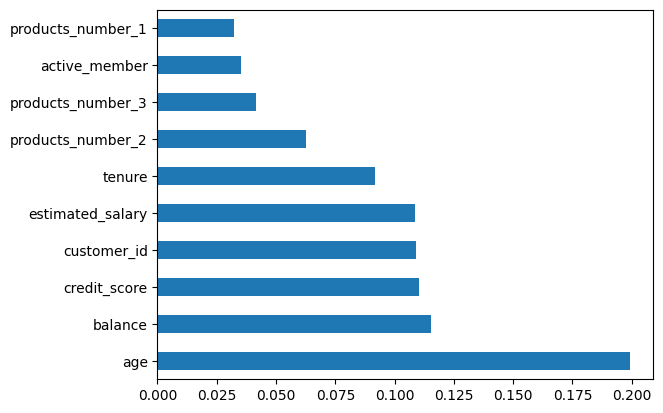

In [125]:
X = bank.drop("churn", axis=1)
y = bank["churn"]
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
 
#plot the graph of feature importances 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [126]:
final_results = pd.concat([Y_test, bank.customer_id], axis =1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['customer_id', 'churn', 'predicted_churn']].reset_index(drop = True)

In [127]:
final_results

,customer_id,churn,predicted_churn
0,15634602,1.0,0
1,15619304,1.0,0
2,15737452,1.0,0
3,15577657,0.0,0
4,15738191,0.0,0
...,...,...,...
2495,15666295,1.0,0
2496,15656710,0.0,1
2497,15586914,0.0,1
2498,15769959,1.0,0


### There are two models created namely logistic regression and decision tree to predict the probability of customer churning. 

### From the result, it can be said that age is most significant feature, that means, older customers are more likely to churn. Apart from that number of product has a high impact on churning. 

### The bank may come up with some strong policies to engage with elderly people so that churning can be reduced. Also the bank maycome up with a very strong rewarding programmes as weel as attractive loan interest. 
